In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DataJobs.csv')
df.info()
df.head()
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Position           200 non-null    int64 
 1   Job Title          200 non-null    object
 2   Company            200 non-null    object
 3   Location           200 non-null    object
 4   Salary             62 non-null     object
 5   Short Description  200 non-null    object
 6   Posted At          16 non-null     object
 7   Job link           200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB
     Position                                          Job Title  \
0           1                                     Data Scientist   
1           2  Senior Artificial Intelligence Researcher for ...   
2           3                              Senior Data Scientist   
3           4                                     Data Scientist   
4           5                      

In [117]:
#EDA
df = df.dropna(subset=['Salary'])
df.fillna({'Posted At': 'No information'}, inplace=True)
df.drop(columns=['Job link'], inplace=True)
df.drop(columns=['Position'], inplace=True)
df.drop(columns=['Posted At'], inplace=True)

df.head()


,Job Title,Company,Location,Salary,Short Description
0,Data Scientist,Robert Half,"Remote in Los Angeles, CA 90024","$120,000 - $140,000 a year",The ideal candidate should be highly skilled i...
4,Data Scientist,US Office of Personnel Management,Remote,"$103,409 - $167,336 a year",Develops and maintains analytics product proje...
8,Data Scientist,Ropes & Gray LLP,"Hybrid work in Boston, MA 02199","$125,000 - $150,000 a year","You will work with lawyers, behavioral scienti..."
10,Data Scientist,Long Beach City College,"Long Beach, CA 90808 \n(Lakewood Village area)","$106,779 - $145,487 a year","Develops an understanding of opportunities, co..."
11,Data Scientist,National Space Defense Center (NSDC),"Colorado Springs, CO 80906 \n(Southwest Colora...","$89,128 - $137,784 a year",Knowledge of data science techniques and techn...


In [118]:
# Formateo para salario
df['Salary'] = df['Salary'].str.replace('a year', '').str.strip()
df['Salary'] = df['Salary'].str.replace('Up to ', '')

df['Salary'] = df['Salary'].str.replace(r'[\$,]', '', regex=True) 

#Promedio salarial
df[['Min Salary', 'Max Salary']] = df['Salary'].str.split(' - ', expand=True)
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')

df['Max Salary'] = df['Max Salary'].fillna(df['Min Salary'])  
df['Anual Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

df.drop(columns=['Salary', 'Min Salary', 'Max Salary'], inplace=True)

df = df[df['Anual Salary'] >= 1000] #Borra salario por hora
df = df.dropna(subset=['Anual Salary'])




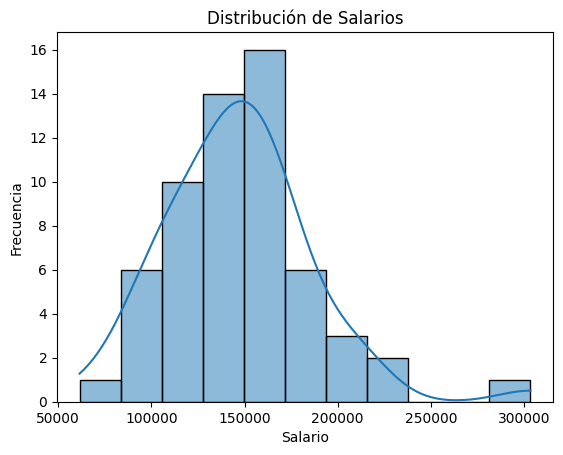

In [119]:
sns.histplot(df['Anual Salary'], kde=True)
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()


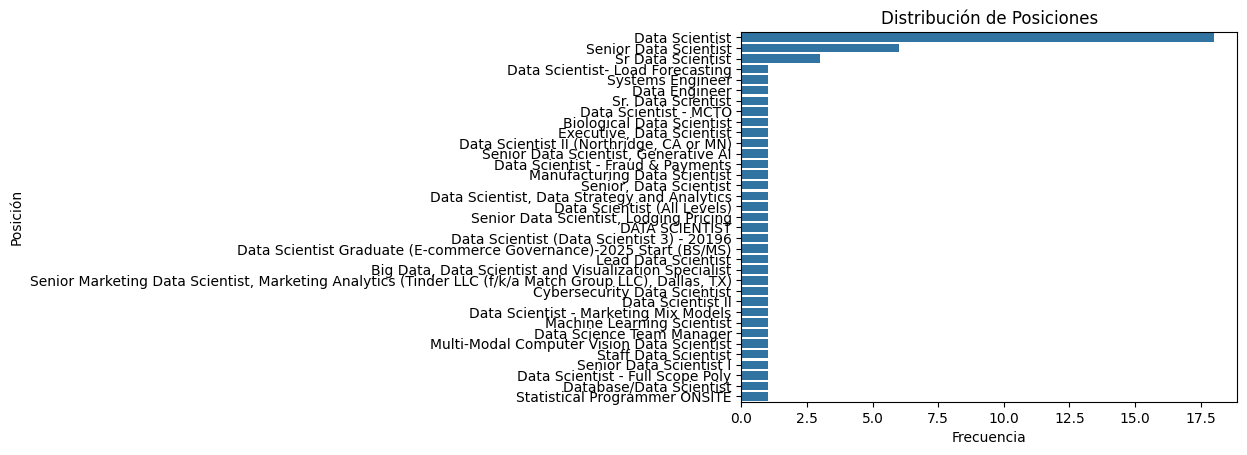

In [120]:
sns.countplot(y=df['Job Title'], order=df['Job Title'].value_counts().index)
plt.title('Distribución de Posiciones')
plt.xlabel('Frecuencia')
plt.ylabel('Posición')
plt.show()


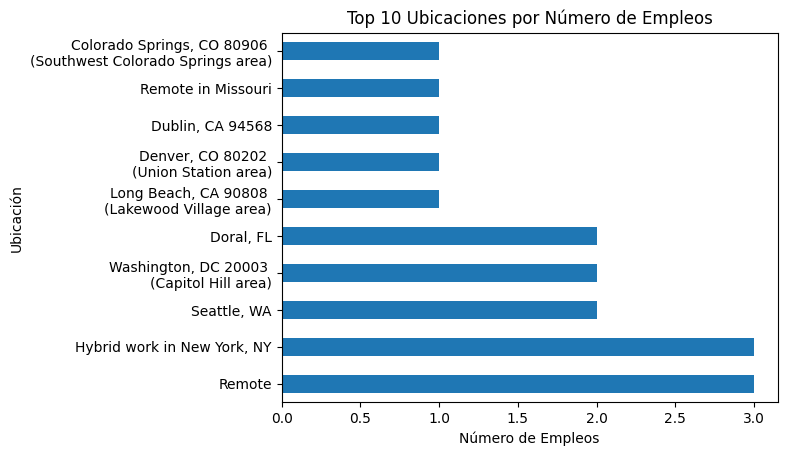

In [121]:
df['Location'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Ubicaciones por Número de Empleos')
plt.xlabel('Número de Empleos')
plt.ylabel('Ubicación')
plt.show()


In [122]:
route = "data_ready.csv"
df.to_csv(route, index=False)

In [123]:
df.head()

,Job Title,Company,Location,Short Description,Anual Salary
0,Data Scientist,Robert Half,"Remote in Los Angeles, CA 90024",The ideal candidate should be highly skilled i...,130000.0
4,Data Scientist,US Office of Personnel Management,Remote,Develops and maintains analytics product proje...,135372.5
8,Data Scientist,Ropes & Gray LLP,"Hybrid work in Boston, MA 02199","You will work with lawyers, behavioral scienti...",137500.0
10,Data Scientist,Long Beach City College,"Long Beach, CA 90808 \n(Lakewood Village area)","Develops an understanding of opportunities, co...",126133.0
11,Data Scientist,National Space Defense Center (NSDC),"Colorado Springs, CO 80906 \n(Southwest Colora...",Knowledge of data science techniques and techn...,113456.0
